<!-- <ul>
<li><a href="#scrollTo=3Ghd4ZGWa-LW&line=1&uniqifier=1">Intro to Drug Discovery</a></li>
<li><a href="#scrollTo=9mpf07Htebhk&line=1&uniqifier=1">How can Machine Learning Help with Drug Discovery</a></li>
<li><a href="sec3">Data Collection from the ChemBL Database</a></li>
<li><a href="sec4">Data Preprocessing</a></li>
      <ul>
          <li><a href="" >kkk</a></li>
      </ul>

<li><a href="sec5">Data Collection from the ChemBL Database</a></li>
<li><a href="sec6">Data Collection from the ChemBL Database</a></li>


</ul> -->



## Project: Machine Learning Aided Drug Discovery
### Drug Candidate Prioritization Using SMILES Data
Name: Sriphani Vardhan Bellamkonda
Prof: Dr. Baris Coskun

Note: Added additional fields of Metrics used at the starting and added some more description on Feature Importance

# Intro to Drug Discovery


Drug discovery is a complex and multidisciplinary process aimed at identifying and developing new medications for the treatment of diseases. The goal is to **find compounds that can effectively and safely interact with specific biological targets, such as proteins or enzymes**, to modify their activity and alleviate or cure the associated medical conditions.

The drug discovery process typically involves several stages:

> **Target Identification and Validation** : Researchers identify and validate specific molecular targets that play a key role in a disease. These targets could be proteins, nucleic acids, or other molecules associated with the disease's progression.

> **Hit Generation**: Scientists search for initial compounds, known as "hits," that have the potential to interact with the chosen target. These hits can be derived from various sources, including natural products, existing drugs, or compounds designed through computational methods.

> **Lead Optimization**: Promising hits are further developed and optimized to enhance their efficacy, selectivity, and safety profile. This stage often involves medicinal chemistry, where chemical modifications are made to improve the compound's properties.

> #### This is followed with PreClinical Testing, Conducting Clinical Trials,  Regulatory Approval, and finally Post Marketing Sureillance.




Drug discovery is a lengthy and resource-intensive process, often taking many years and involving collaboration between scientists, researchers, and pharmaceutical companies.

However, what takes the most time are the Hit Generation and Lead Optimization stages.  It is very resource intensive for the doctors to maunally go throught thousands of compounds and molecules and determine if they can be a possible lead for further optimization. That is where Machine Learning can dive in and help the process.

# How can Machine Learning aid in Drug Discovery

Like mentioned in the previous section, Machine learning can help in the Hit generation phase of the drug discovery process. How can it do so?

It can parse through rows of protein ligand complexes or compounds and their "activity level" to identify the kinds of molecules a protein binds with well and acts. This can help us curate a predictor such that given a molecule whether it can predict how likely it is to bind with a protein. Hence when scientists hypothesize a new molecule, they can, even before chemically making it, check whether it can be effective or not.

Now let us install a few important libraries

# Metrics Used

We will be using the following metrics

**Accuracy** measures the overall correctness of a classification model, computed as the ratio of correct predictions to the total predictions.
<br>
Formula: Accuracy = (Number of Correct Predictions) / (Total Number of Predictions)

**Balanced Accuracy** is designed for imbalanced datasets, is the average accuracy per class, combining sensitivity and specificity.
<br>
Formula: Balanced Accuracy = (Sensitivity + Specificity) / 2

**ROC AUC** (Receiver Operating Characteristic Area Under the Curve) assesses a binary classification model's ability to distinguish between positive and negative classes across varying probability thresholds.
<br>
It computes the area under the ROC curve, depicting the true positive rate against the false positive rate.

**F1 Score** balances precision and recall, provides a singular metric for model performance, especially in scenarios with imbalanced class distributions.
<br>
Formula: F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

[A:]

In [10]:
!pip install matplotlib==3.5.2

In [11]:
#instal chembl web service package to deal with data
! pip install chembl_webresource_client

  Using cached attrs-21.4.0-py2.py3-none-any.whl (60 kB)
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
jsonschema 4.19.2 requires attrs>=22.2.0, but you have attrs 21.4.0 which is incompatible.
referencing 0.31.1 requires attrs>=22.2.0, but you have attrs 21.4.0 which is incompatible.




# Import libraries.


In [12]:
# Core
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from matplotlib.pyplot.bar_label
import seaborn as sns
from scipy import stats
import glob
import random
import datetime
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

import os
import pickle
# from  datasist.structdata import detect_outliers
from tqdm import tqdm
#chembl Package
from chembl_webresource_client.new_client import new_client
# Core
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(rc={'figure.figsize':[7,7]},font_scale=1.2)
from datetime import date,timedelta
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
import sklearn
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# Pre Processing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Regressors
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
# Error Metrics
from sklearn.metrics import r2_score #r2 square
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import ConfusionMatrixDisplay ,classification_report
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score


#classefication
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier #stacstic gradient descent clasifeier
import graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#crossvalidation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import ConfusionMatrixDisplay
#clustring
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
#hyper parameter tunning
from sklearn.model_selection import GridSearchCV
#pca
from sklearn.decomposition import PCA
#clustring
from sklearn.cluster import KMeans
from warnings import filterwarnings
filterwarnings("ignore")

In [13]:
seed = 42
np.random.seed =seed

#  📌Helper Function ⚒

We define 3 handy functions below namely check_duplicate, numerical_plotting, and categorical_plotting.





In [14]:
#check duplicate data
def check_duplicate(df):
    if df.duplicated().all():
        return  'There are duplicate Data in Data Frame Nedded To be  removed . '
    else :
        return 'Data Is clean ,No Duplicate Data Found .'

def numerical_plotting(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.distplot(df[col],kde=True)
    plt.xticks(rotation=45)
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

def categorical_plotting(df,col,title):
    fig, ax = plt.subplots(figsize=(10,5))
    ax=sns.countplot(x=col, data=df, palette='flare', order = df[col].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.bar_label(ax.containers[0])
    plt.title(title)
    plt.show()

## 📌 About Dataset    
ChEMBL is a manually curated database of bioactive molecules with drug-like properties. It is constantly updated and maintained by the larger scintific community. It brings together chemical, bioactivity and genomic data to aid the translation of genomic information into effective new drugs.

This database consists of 629943 biological compounds from 1552 organisms. Since our project focuses on drug discovery for breast cancer we will collect only those rows from it pertaining to the aromatase enzyme.

## Breast Cancer
Research shows that Breast Cancer, specifically, the ER positive Breast cancer, effects primarily females above the age of 50. Aromatase is an enzyme occuring in the fat tissue which facilitates the production of estrogen. However, aromatase can malfunction and cause excess prodution of estrogen which is the leading cause of er positive breast cancer. Then curating a drug which can bind to the aromatase enzyme and thus prevent it from converting other hormones to estrogen. Hence these are called aromatase inhibitors.

# 📌 Data Collection

In this project we will collect our own data from the database.

First we search for our target protein in the ChemBL database.


Target protein: "Aromatase".

In [15]:
#create an object
target = new_client.target
#prepare query for our target protien
target_query = target.search('aromatase')
#convert it to data frame
targets = pd.DataFrame.from_dict(target_query)
targets

cross_references           organism  \
0  [{'xref_id': 'P11511', 'xref_name': None, 'xre...       Homo sapiens   
1  [{'xref_id': 'P22443', 'xref_name': None, 'xre...  Rattus norvegicus   

              pref_name  score  species_group_flag target_chembl_id  \
0  Cytochrome P450 19A1   20.0               False       CHEMBL1978   
1  Cytochrome P450 19A1   20.0               False       CHEMBL3859   

                                   target_components     target_type  tax_id  
0  [{'accession': 'P11511', 'component_descriptio...  SINGLE PROTEIN    9606  
1  [{'accession': 'P22443', 'component_descriptio...  SINGLE PROTEIN   10116


<!-- <h4  id="1.2-|-Select  which  Target will use in our Casen"><b>1.2 <span style="color:#4a8fdd">|</span> Select  which  Target will use in our Case</b></h4> -->

Since we want to develop an aromatase inhibitor for humans we will choose the organism as Homo Sapiens

In [16]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL1978'

# Collect IC50 standard type data
Since we want to collect data curated to the inhibition of aromatase we should focus on those molecules. For this we will use the IC50 measure.
Half maximal inhibitory concentration (IC50) is a measure of the potency of a substance in inhibiting a specific biological or biochemical function.

Hence, lower the standard value of IC50 higher the potency of the drug.

In [17]:
#retrive biomedical activity of protien
activity = new_client.activity
response = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [18]:
df = pd.DataFrame.from_dict(response)
df.head()

action_type activity_comment  activity_id activity_properties  \
0        None             None        82585                  []   
1        None             None        94540                  []   
2        None             None       112960                  []   
3        None             None       116766                  []   
4        None             None       118017                  []   

  assay_chembl_id                                  assay_description  \
0    CHEMBL666794                 Inhibition of Cytochrome P450 19A1   
1    CHEMBL666794                 Inhibition of Cytochrome P450 19A1   
2    CHEMBL661700  In vitro inhibition of human Cytochrome P450 19A1   
3    CHEMBL661700  In vitro inhibition of human Cytochrome P450 19A1   
4    CHEMBL661700  In vitro inhibition of human Cytochrome P450 19A1   

  assay_type assay_variant_accession assay_variant_mutation bao_endpoint  \
0          B                    None                   None  BAO_0000190   
1          B                    None                   None  BAO_0000190   
2          B                    None                   None  BAO_0000190   
3          B                    None                   None  BAO_0000190   
4          B                    None                   None  BAO_0000190   

    bao_format              bao_label  \
0  BAO_0000357  single protein format   
1  BAO_0000357  single protein format   
2  BAO_0000357  single protein format   
3  BAO_0000357  single protein format   
4  BAO_0000357  single protein format   

                                    canonical_smiles data_validity_comment  \
0          CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12                  None   
1  C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...                  None   
2      CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21                  None   
3             CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21                  None   
4                 Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21                  None   

  data_validity_description document_chembl_id      document_journal  \
0                      None      CHEMBL1133116            J Med Chem   
1                      None      CHEMBL1133116            J Med Chem   
2                      None      CHEMBL1131917  Bioorg Med Chem Lett   
3                      None      CHEMBL1131917  Bioorg Med Chem Lett   
4                      None      CHEMBL1131917  Bioorg Med Chem Lett   

   document_year                                  ligand_efficiency  \
0           2000  {'bei': '15.62', 'le': '0.29', 'lle': '0.86', ...   
1           2000                                               None   
2           1999  {'bei': '16.06', 'le': '0.35', 'lle': '0.91', ...   
3           1999  {'bei': '22.68', 'le': '0.41', 'lle': '2.61', ...   
4           1999  {'bei': '22.58', 'le': '0.43', 'lle': '2.68', ...   

  molecule_chembl_id molecule_pref_name parent_molecule_chembl_id  \
0       CHEMBL341591               None              CHEMBL341591   
1      CHEMBL2111947               None             CHEMBL2111947   
2       CHEMBL431859               None              CHEMBL431859   
3       CHEMBL113637               None              CHEMBL113637   
4       CHEMBL112021               None              CHEMBL112021   

  pchembl_value  potential_duplicate  \
0          5.15                    0   
1          None                    0   
2          6.62                    0   
3          7.24                    0   
4          7.27                    0   

                                  qudt_units  record_id relation  src_id  \
0  http://www.openphacts.org/units/Nanomolar     267172        =       1   
1  http://www.openphacts.org/units/Nanomolar     267163        >       1   
2  http://www.openphacts.org/units/Nanomolar     214178        =       1   
3  http://www.openphacts.org/units/Nanomolar     214179        =       1   
4  http://www.openphacts.org/units/Nanomolar     214173        =       1   

   standard_flag sta

In [19]:
df.shape

(2966, 46)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   action_type                85 non-null     object
 1   activity_comment           94 non-null     object
 2   activity_id                2966 non-null   int64 
 3   activity_properties        2966 non-null   object
 4   assay_chembl_id            2966 non-null   object
 5   assay_description          2966 non-null   object
 6   assay_type                 2966 non-null   object
 7   assay_variant_accession    0 non-null      object
 8   assay_variant_mutation     0 non-null      object
 9   bao_endpoint               2966 non-null   object
 10  bao_format                 2966 non-null   object
 11  bao_label                  2966 non-null   object
 12  canonical_smiles           2966 non-null   object
 13  data_validity_comment      127 non-null    object
 14  data_val

### standard value refers to the potency of the drug the lower of its value is the higher of potency of drugs


# Data Preprocessing - part 1
* Handel Missing Data
* Data Labeling (binning)


Missing data

In [21]:
# check missing Value  in [standard_value,canonical_smiles]
df.isnull().sum().sort_values(ascending=False)[['standard_value','canonical_smiles']]

standard_value      76
canonical_smiles     0
dtype: int64

Canonical Smiles is the Simplified Molecular Line Entry record for each of the compounds. This represents the molecule and Standard Value is the drug effectiveness of Molecule on the Protein.

Lesser the better. Think of it like, lesser concentration but derives the same effect.

---



In [22]:
# i will drop any non value in [standard_value,canonical_smiles]
df2 = df[df['standard_value'].notnull()]
df2

action_type activity_comment  \
0                                                  None             None   
1                                                  None             None   
2                                                  None             None   
3                                                  None             None   
4                                                  None             None   
...                                                 ...              ...   
2961  {'action_type': 'INHIBITOR', 'description': 'N...             None   
2962                                               None             None   
2963  {'action_type': 'INHIBITOR', 'description': 'N...             None   
2964  {'action_type': 'INHIBITOR', 'description': 'N...             None   
2965  {'action_type': 'INHIBITOR', 'description': 'N...             None   

      activity_id                                activity_properties  \
0           82585                                                 []   
1           94540                                                 []   
2          112960                                                 []   
3          116766                                                 []   
4          118017                                                 []   
...           ...                                                ...   
2961     24742461  [{'comments': None, 'relation': '=', 'result_f...   
2962     24783443                                                 []   
2963     24886565                                                 []   
2964     24886566                                                 []   
2965     24886567                                                 []   

     assay_chembl_id                                  assay_description  \
0       CHEMBL666794                 Inhibition of Cytochrome P450 19A1   
1       CHEMBL666794                 Inhibition of Cytochrome P450 19A1   
2       CHEMBL661700  In vitro inhibition of human Cytochrome P450 19A1   
3       CHEMBL661700  In vitro inhibition of human Cytochrome P450 19A1   
4       CHEMBL661700  In vitro inhibition of human Cytochrome P450 19A1   
...              ...                                                ...   
2961   CHEMBL5118295  Inhibition of aromatase in human JEG-3 cells u...   
2962   CHEMBL5130158  Inhibition of human placental microsome CYP19 ...   
2963   CHEMBL5157477           Inhibition of aromatase (unknown origin)   
2964   CHEMBL5157477           Inhibition of aromatase (unknown origin)   
2965   CHEMBL5157477           Inhibition of aromatase (unknown origin)   

     assay_type assay_variant_accession assay_variant_mutation bao_endpoint  \
0             B                    None                   None  BAO_0000190   
1             B                    None                   None  BAO_0000190   
2             B                    None                   None  BAO_0000190   
3             B                    None                   None  BAO_0000190   
4             B                    None                   None  BAO_0000190   
...         ...                     ...                    ...          ...   
2961          B                    None                   None  BAO_0000190   
2962          A                    None                   None  BAO_0000190   
2963          B                    None                   None  BAO_0000190   
2964          B                    None                   None  BAO_0000190   
2965          B                    None                   None  BAO_0000190   

       bao_format              bao_label  \
0     BAO_0000357  single protein format   
1     BAO_0000357  single protein format   
2     BAO_0000357  single protein format   
3     BAO_0000357  single protein format   
4     BAO_0000357  single protein format   
...           ...                    ...   
2961  BAO_0000219      cell-based format   
2962  BAO_0000251       microsome format   
2963  BAO_0000357  s

In [23]:
df2.reset_index(inplace = True)

In [24]:
df2

index                                        action_type  \
0         0                                               None   
1         1                                               None   
2         2                                               None   
3         3                                               None   
4         4                                               None   
...     ...                                                ...   
2885   2961  {'action_type': 'INHIBITOR', 'description': 'N...   
2886   2962                                               None   
2887   2963  {'action_type': 'INHIBITOR', 'description': 'N...   
2888   2964  {'action_type': 'INHIBITOR', 'description': 'N...   
2889   2965  {'action_type': 'INHIBITOR', 'description': 'N...   

     activity_comment  activity_id  \
0                None        82585   
1                None        94540   
2                None       112960   
3                None       116766   
4                None       118017   
...               ...          ...   
2885             None     24742461   
2886             None     24783443   
2887             None     24886565   
2888             None     24886566   
2889             None     24886567   

                                    activity_properties assay_chembl_id  \
0                                                    []    CHEMBL666794   
1                                                    []    CHEMBL666794   
2                                                    []    CHEMBL661700   
3                                                    []    CHEMBL661700   
4                                                    []    CHEMBL661700   
...                                                 ...             ...   
2885  [{'comments': None, 'relation': '=', 'result_f...   CHEMBL5118295   
2886                                                 []   CHEMBL5130158   
2887                                                 []   CHEMBL5157477   
2888                                                 []   CHEMBL5157477   
2889                                                 []   CHEMBL5157477   

                                      assay_description assay_type  \
0                    Inhibition of Cytochrome P450 19A1          B   
1                    Inhibition of Cytochrome P450 19A1          B   
2     In vitro inhibition of human Cytochrome P450 19A1          B   
3     In vitro inhibition of human Cytochrome P450 19A1          B   
4     In vitro inhibition of human Cytochrome P450 19A1          B   
...                                                 ...        ...   
2885  Inhibition of aromatase in human JEG-3 cells u...          B   
2886  Inhibition of human placental microsome CYP19 ...          A   
2887           Inhibition of aromatase (unknown origin)          B   
2888           Inhibition of aromatase (unknown origin)          B   
2889           Inhibition of aromatase (unknown origin)          B   

     assay_variant_accession assay_variant_mutation bao_endpoint   bao_format  \
0                       None                   None  BAO_0000190  BAO_0000357   
1                       None                   None  BAO_0000190  BAO_0000357   
2                       None                   None  BAO_0000190  BAO_0000357   
3                       None                   None  BAO_0000190  BAO_0000357   
4                       None                   None  BAO_0000190  BAO_0000357   
...                      ...                    ...          ...          ...   
2885                    None                   None  BAO_0000190  BAO_0000219   
2886                    None                   None  BAO_0000190  BAO_0000251   
2887                    None                   None  BAO_0000190  BAO_0000357   
2888                    None                   None  BAO_0000190  BAO_0000357   
2889                    None                   None  BAO_0000190  BAO_0000357   

                  bao_label  \
0     sing

<!-- <h4  id="2.2-|-Data Labeling "><b>2.2 <span style="color:#4a8fdd">|</span> Data Labeling</b></h4> -->

# Data Labeling

Based on the standard value, we can bin the molecules into active, inactive, and intermediate.

In [25]:
bioactivity_class = []
class_number = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
    class_number.append(0)
  elif float(i) <= 1000:
    bioactivity_class.append("active")
    class_number.append(1)
  else:
    class_number.append(2)
    bioactivity_class.append("intermediate")

<!--
1.  **Molecure is chemical strcure that produce  modlatory activity ,it exerts some effect on protien** .

2.   **Drug will act dirictly on target protien in order to produce desired bilogical effect**
3.   **Each compound will describe by molecure cahmbel id**


 -->
Now if we discard the remaining labeling and documentation related columns, we are left with a few columns which we can actually use for training a machine learning model. In that the most important one is canonical_smiles which represents the molecular information.

In [26]:
#collect [molecule_chembl_id,standard_value,canonical_smiles,classes] in one data frame
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2[selection]
df3 =pd.concat([df3,pd.Series(bioactivity_class,name='class'), pd.Series(class_number, name='class_number') ],axis=1)
df3

molecule_chembl_id                                   canonical_smiles  \
0          CHEMBL341591          CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12   
1         CHEMBL2111947  C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...   
2          CHEMBL431859      CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21   
3          CHEMBL113637             CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21   
4          CHEMBL112021                 Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21   
...                 ...                                                ...   
2885      CHEMBL1200374  C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...   
2886      CHEMBL5184829  O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...   
2887      CHEMBL5176279         CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1   
2888      CHEMBL5177928               COc1ccc2cc(/C=N/NC3=NC(=O)CS3)ccc2c1   
2889         CHEMBL1444               N#Cc1ccc(C(c2ccc(C#N)cc2)n2cncn2)cc1   

     standard_value         class  class_number  
0            7100.0  intermediate             2  
1           50000.0      inactive             0  
2             238.0        active             1  
3              57.0        active             1  
4              54.0        active             1  
...             ...           ...           ...  
2885           50.1        active             1  
2886        10000.0      inactive             0  
2887           31.0        active             1  
2888           42.0        active             1  
2889           26.0        active             1  

[2890 rows x 5 columns]

In [28]:
df2.pop('index')
df2.head()

action_type activity_comment  activity_id activity_properties  \
0        None             None        82585                  []   
1        None             None        94540                  []   
2        None             None       112960                  []   
3        None             None       116766                  []   
4        None             None       118017                  []   

  assay_chembl_id                                  assay_description  \
0    CHEMBL666794                 Inhibition of Cytochrome P450 19A1   
1    CHEMBL666794                 Inhibition of Cytochrome P450 19A1   
2    CHEMBL661700  In vitro inhibition of human Cytochrome P450 19A1   
3    CHEMBL661700  In vitro inhibition of human Cytochrome P450 19A1   
4    CHEMBL661700  In vitro inhibition of human Cytochrome P450 19A1   

  assay_type assay_variant_accession assay_variant_mutation bao_endpoint  \
0          B                    None                   None  BAO_0000190   
1          B                    None                   None  BAO_0000190   
2          B                    None                   None  BAO_0000190   
3          B                    None                   None  BAO_0000190   
4          B                    None                   None  BAO_0000190   

    bao_format              bao_label  \
0  BAO_0000357  single protein format   
1  BAO_0000357  single protein format   
2  BAO_0000357  single protein format   
3  BAO_0000357  single protein format   
4  BAO_0000357  single protein format   

                                    canonical_smiles data_validity_comment  \
0          CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12                  None   
1  C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...                  None   
2      CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21                  None   
3             CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21                  None   
4                 Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21                  None   

  data_validity_description document_chembl_id      document_journal  \
0                      None      CHEMBL1133116            J Med Chem   
1                      None      CHEMBL1133116            J Med Chem   
2                      None      CHEMBL1131917  Bioorg Med Chem Lett   
3                      None      CHEMBL1131917  Bioorg Med Chem Lett   
4                      None      CHEMBL1131917  Bioorg Med Chem Lett   

   document_year                                  ligand_efficiency  \
0           2000  {'bei': '15.62', 'le': '0.29', 'lle': '0.86', ...   
1           2000                                               None   
2           1999  {'bei': '16.06', 'le': '0.35', 'lle': '0.91', ...   
3           1999  {'bei': '22.68', 'le': '0.41', 'lle': '2.61', ...   
4           1999  {'bei': '22.58', 'le': '0.43', 'lle': '2.68', ...   

  molecule_chembl_id molecule_pref_name parent_molecule_chembl_id  \
0       CHEMBL341591               None              CHEMBL341591   
1      CHEMBL2111947               None             CHEMBL2111947   
2       CHEMBL431859               None              CHEMBL431859   
3       CHEMBL113637               None              CHEMBL113637   
4       CHEMBL112021               None              CHEMBL112021   

  pchembl_value  potential_duplicate  \
0          5.15                    0   
1          None                    0   
2          6.62                    0   
3          7.24                    0   
4          7.27                    0   

                                  qudt_units  record_id relation  src_id  \
0  http://www.openphacts.org/units/Nanomolar     267172        =       1   
1  http://www.openphacts.org/units/Nanomolar     267163        >       1   
2  http://www.openphacts.org/units/Nanomolar     214178        =       1   
3  http://www.openphacts.org/units/Nanomolar     214179        =       1   
4  http://www.openphacts.org/units/Nanomolar     214173        =       1   

   standard_flag sta

In [29]:
#remove null datata in class
df3 = df3[df3['class'].notnull()]
df3 =df3[df3['standard_value'].notnull()]
df3 =df3[df3['canonical_smiles'].notnull()]
df3

molecule_chembl_id                                   canonical_smiles  \
0          CHEMBL341591          CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12   
1         CHEMBL2111947  C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...   
2          CHEMBL431859      CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21   
3          CHEMBL113637             CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21   
4          CHEMBL112021                 Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21   
...                 ...                                                ...   
2885      CHEMBL1200374  C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...   
2886      CHEMBL5184829  O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...   
2887      CHEMBL5176279         CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1   
2888      CHEMBL5177928               COc1ccc2cc(/C=N/NC3=NC(=O)CS3)ccc2c1   
2889         CHEMBL1444               N#Cc1ccc(C(c2ccc(C#N)cc2)n2cncn2)cc1   

     standard_value         class  class_number  
0            7100.0  intermediate             2  
1           50000.0      inactive             0  
2             238.0        active             1  
3              57.0        active             1  
4              54.0        active             1  
...             ...           ...           ...  
2885           50.1        active             1  
2886        10000.0      inactive             0  
2887           31.0        active             1  
2888           42.0        active             1  
2889           26.0        active             1  

[2890 rows x 5 columns]

<!-- <h4 id="1.2-|-dataset shape"><b>3.1 <span style="color:#4a8fdd">|</span>  Calculate Lipinski Descriptors</b></h4> -->

# Dataset feature Expansion via Lipinski Descriptors.

Since training from a single string column is not much informational, we will also use the Lipinski Descriptors which are based on the molecular sequence and tell us a few key information about it.

*   Lipinski Descriptors are used for evaluating the druglikeness of compounds. Such druglikeness is based on the **Absorption,** **Distribution**, **Metabolism** and **Excretion (ADME)** that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

* Molecular weight < 500 g/mol
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10











In [30]:
! pip install rdkit-pypi

In [31]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [32]:
new_df = df3.copy()

In [33]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    return descriptors

In [34]:
df_lipinski = lipinski(new_df.canonical_smiles)
df_lipinski

MW     LogP  NumHDonors  NumHAcceptors
0     329.528  4.28820         2.0            2.0
1     315.501  3.89810         2.0            2.0
2     412.306  5.70542         0.0            3.0
3     319.383  4.63450         0.0            3.0
4     321.811  4.58780         0.0            3.0
...       ...      ...         ...            ...
2885  296.410  4.02950         0.0            2.0
2886  373.416  3.11580         2.0            5.0
2887  369.446  3.85650         1.0            7.0
2888  299.355  2.40130         1.0            5.0
2889  285.310  2.65916         0.0            5.0

[2890 rows x 4 columns]

### Merge Lipinski feature columns with our initial dataframe

In [35]:
merged_df = pd.concat([df_lipinski,new_df],axis=1)
merged_df

MW     LogP  NumHDonors  NumHAcceptors molecule_chembl_id  \
0     329.528  4.28820         2.0            2.0       CHEMBL341591   
1     315.501  3.89810         2.0            2.0      CHEMBL2111947   
2     412.306  5.70542         0.0            3.0       CHEMBL431859   
3     319.383  4.63450         0.0            3.0       CHEMBL113637   
4     321.811  4.58780         0.0            3.0       CHEMBL112021   
...       ...      ...         ...            ...                ...   
2885  296.410  4.02950         0.0            2.0      CHEMBL1200374   
2886  373.416  3.11580         2.0            5.0      CHEMBL5184829   
2887  369.446  3.85650         1.0            7.0      CHEMBL5176279   
2888  299.355  2.40130         1.0            5.0      CHEMBL5177928   
2889  285.310  2.65916         0.0            5.0         CHEMBL1444   

                                       canonical_smiles standard_value  \
0             CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12         7100.0   
1     C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...        50000.0   
2         CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21          238.0   
3                CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21           57.0   
4                    Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21           54.0   
...                                                 ...            ...   
2885  C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...           50.1   
2886  O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...        10000.0   
2887         CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1           31.0   
2888               COc1ccc2cc(/C=N/NC3=NC(=O)CS3)ccc2c1           42.0   
2889               N#Cc1ccc(C(c2ccc(C#N)cc2)n2cncn2)cc1           26.0   

             class  class_number  
0     intermediate             2  
1         inactive             0  
2           active             1  
3           active             1  
4           active             1  
...            ...           ...  
2885        active             1  
2886      inactive             0  
2887        active             1  
2888        active             1  
2889        active             1  

[2890 rows x 9 columns]

### Remove Null Values from the new columns

In [36]:
#delete null column
merged_df =merged_df[merged_df['MW'].notnull()]
merged_df =merged_df[merged_df['LogP'].notnull()]
merged_df =merged_df[merged_df['NumHDonors'].notnull()]
merged_df =merged_df[merged_df['NumHAcceptors'].notnull()]
merged_df

MW     LogP  NumHDonors  NumHAcceptors molecule_chembl_id  \
0     329.528  4.28820         2.0            2.0       CHEMBL341591   
1     315.501  3.89810         2.0            2.0      CHEMBL2111947   
2     412.306  5.70542         0.0            3.0       CHEMBL431859   
3     319.383  4.63450         0.0            3.0       CHEMBL113637   
4     321.811  4.58780         0.0            3.0       CHEMBL112021   
...       ...      ...         ...            ...                ...   
2885  296.410  4.02950         0.0            2.0      CHEMBL1200374   
2886  373.416  3.11580         2.0            5.0      CHEMBL5184829   
2887  369.446  3.85650         1.0            7.0      CHEMBL5176279   
2888  299.355  2.40130         1.0            5.0      CHEMBL5177928   
2889  285.310  2.65916         0.0            5.0         CHEMBL1444   

                                       canonical_smiles standard_value  \
0             CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12         7100.0   
1     C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...        50000.0   
2         CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21          238.0   
3                CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21           57.0   
4                    Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21           54.0   
...                                                 ...            ...   
2885  C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...           50.1   
2886  O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...        10000.0   
2887         CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1           31.0   
2888               COc1ccc2cc(/C=N/NC3=NC(=O)CS3)ccc2c1           42.0   
2889               N#Cc1ccc(C(c2ccc(C#N)cc2)n2cncn2)cc1           26.0   

             class  class_number  
0     intermediate             2  
1         inactive             0  
2           active             1  
3           active             1  
4           active             1  
...            ...           ...  
2885        active             1  
2886      inactive             0  
2887        active             1  
2888        active             1  
2889        active             1  

[2890 rows x 9 columns]

# Data Preprocessing - part 2

* Data normalization
* Data Statistics
* Data Analysis & Visualization

# Classification dataset
So far we have made the dataset ready for classification task of drug discovery. We will not be using the intermediate class as it is neither exactly acitve or inactive. An alternative approach would be to consider the intermediate range to be inactive as well.

# Regression dataset (optional)

Though not necessary, we can perform regression analysis on this dataset as well. We can also use the standard_value as a output column and train regression models to predict its value. However, when we closely look upon the data we see a major problem.

In [37]:
merged_df['standard_value'] = pd.to_numeric(merged_df['standard_value'], downcast='float')
merged_df.describe()

MW         LogP   NumHDonors  NumHAcceptors  standard_value  \
count  2890.000000  2890.000000  2890.000000    2890.000000    2.890000e+03   
mean    321.351385     3.657816     0.644983       3.865744    2.173576e+10   
std      93.507497     1.311032     1.044485       1.869571    7.235369e+11   
min     130.078000    -1.402800     0.000000       0.000000    0.000000e+00   
25%     257.333750     2.830815     0.000000       3.000000    1.000000e+02   
50%     306.619500     3.654300     0.000000       3.000000    1.000000e+03   
75%     358.416000     4.415725     1.000000       5.000000    7.370000e+03   
max     914.664000    10.306000     9.000000      15.000000    3.388442e+13   

       class_number  
count   2890.000000  
mean       1.062630  
std        0.703958  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        2.000000  
max        2.000000

<AxesSubplot:ylabel='Density'>

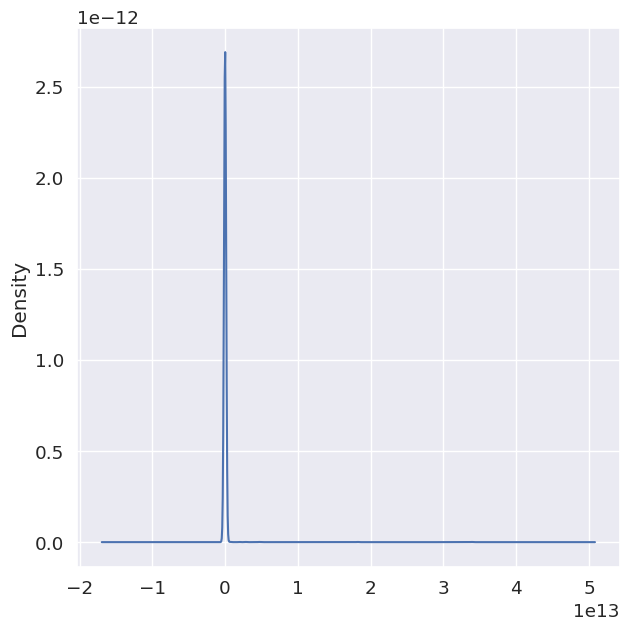

In [38]:
merged_df['standard_value'].plot(kind='kde')

We can see that the data distribution of IC50 is very sharp. With the 1st quartile, second quartile and the third quartile close to 1000 (10^3) , whereas the maximum is at 10^13. Hence, we won't be able to train a sensible regressor which can accurately predict this value realiably with the limited number of records we have.

Hence, we have to normalize this data.

### Data Normalization 

*  Convert IC50 to pIC50
To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

This custom function pIC50() will accept a DataFrame as input and will:

Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10
Take the molar value and apply -log10
Delete the standard_value column and create a new pIC50 column






In [39]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x

In [40]:
def norm_value(input):
    norm = []

    for i in input['standard_value'].astype(float):
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input

    return x

## Convert IC50 to pIC50

In [41]:
#apply normalization
df_norm = norm_value(merged_df)
df_norm

MW     LogP  NumHDonors  NumHAcceptors molecule_chembl_id  \
0     329.528  4.28820         2.0            2.0       CHEMBL341591   
1     315.501  3.89810         2.0            2.0      CHEMBL2111947   
2     412.306  5.70542         0.0            3.0       CHEMBL431859   
3     319.383  4.63450         0.0            3.0       CHEMBL113637   
4     321.811  4.58780         0.0            3.0       CHEMBL112021   
...       ...      ...         ...            ...                ...   
2885  296.410  4.02950         0.0            2.0      CHEMBL1200374   
2886  373.416  3.11580         2.0            5.0      CHEMBL5184829   
2887  369.446  3.85650         1.0            7.0      CHEMBL5176279   
2888  299.355  2.40130         1.0            5.0      CHEMBL5177928   
2889  285.310  2.65916         0.0            5.0         CHEMBL1444   

                                       canonical_smiles  standard_value  \
0             CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12          7100.0   
1     C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...         50000.0   
2         CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21           238.0   
3                CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21            57.0   
4                    Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21            54.0   
...                                                 ...             ...   
2885  C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...            50.1   
2886  O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...         10000.0   
2887         CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1            31.0   
2888               COc1ccc2cc(/C=N/NC3=NC(=O)CS3)ccc2c1            42.0   
2889               N#Cc1ccc(C(c2ccc(C#N)cc2)n2cncn2)cc1            26.0   

             class  class_number  standard_value_norm  
0     intermediate             2               7100.0  
1         inactive             0              50000.0  
2           active             1                238.0  
3           active             1                 57.0  
4           active             1                 54.0  
...            ...           ...                  ...  
2885        active             1                 50.1  
2886      inactive             0              10000.0  
2887        active             1                 31.0  
2888        active             1                 42.0  
2889        active             1                 26.0  

[2890 rows x 10 columns]

In [42]:
#apply pci50 transformation for more data distribution
df_final = pIC50(df_norm)
df_final

MW     LogP  NumHDonors  NumHAcceptors molecule_chembl_id  \
0     329.528  4.28820         2.0            2.0       CHEMBL341591   
1     315.501  3.89810         2.0            2.0      CHEMBL2111947   
2     412.306  5.70542         0.0            3.0       CHEMBL431859   
3     319.383  4.63450         0.0            3.0       CHEMBL113637   
4     321.811  4.58780         0.0            3.0       CHEMBL112021   
...       ...      ...         ...            ...                ...   
2885  296.410  4.02950         0.0            2.0      CHEMBL1200374   
2886  373.416  3.11580         2.0            5.0      CHEMBL5184829   
2887  369.446  3.85650         1.0            7.0      CHEMBL5176279   
2888  299.355  2.40130         1.0            5.0      CHEMBL5177928   
2889  285.310  2.65916         0.0            5.0         CHEMBL1444   

                                       canonical_smiles  standard_value  \
0             CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12          7100.0   
1     C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...         50000.0   
2         CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21           238.0   
3                CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21            57.0   
4                    Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21            54.0   
...                                                 ...             ...   
2885  C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...            50.1   
2886  O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...         10000.0   
2887         CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1            31.0   
2888               COc1ccc2cc(/C=N/NC3=NC(=O)CS3)ccc2c1            42.0   
2889               N#Cc1ccc(C(c2ccc(C#N)cc2)n2cncn2)cc1            26.0   

             class  class_number     pIC50  
0     intermediate             2  5.148742  
1         inactive             0  4.301030  
2           active             1  6.623423  
3           active             1  7.244125  
4           active             1  7.267606  
...            ...           ...       ...  
2885        active             1  7.300162  
2886      inactive             0  5.000000  
2887        active             1  7.508638  
2888        active             1  7.376751  
2889        active             1  7.585027  

[2890 rows x 10 columns]

In [43]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2890 entries, 0 to 2889
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MW                  2890 non-null   float64
 1   LogP                2890 non-null   float64
 2   NumHDonors          2890 non-null   float64
 3   NumHAcceptors       2890 non-null   float64
 4   molecule_chembl_id  2890 non-null   object 
 5   canonical_smiles    2890 non-null   object 
 6   standard_value      2890 non-null   float64
 7   class               2890 non-null   object 
 8   class_number        2890 non-null   int64  
 9   pIC50               2890 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 248.4+ KB


In [44]:
df_final.describe()

MW         LogP   NumHDonors  NumHAcceptors  standard_value  \
count  2890.000000  2890.000000  2890.000000    2890.000000    2.890000e+03   
mean    321.351385     3.657816     0.644983       3.865744    2.173576e+10   
std      93.507497     1.311032     1.044485       1.869571    7.235369e+11   
min     130.078000    -1.402800     0.000000       0.000000    0.000000e+00   
25%     257.333750     2.830815     0.000000       3.000000    1.000000e+02   
50%     306.619500     3.654300     0.000000       3.000000    1.000000e+03   
75%     358.416000     4.415725     1.000000       5.000000    7.370000e+03   
max     914.664000    10.306000     9.000000      15.000000    3.388442e+13   

       class_number        pIC50  
count   2890.000000  2890.000000  
mean       1.062630          inf  
std        0.703958          NaN  
min        0.000000     1.000000  
25%        1.000000     5.132533  
50%        1.000000     6.000000  
75%        2.000000     7.000000  
max        2.000000          inf

Let us remove any undefined data which might have resulted from the log transformation.

In [45]:
df_final[df_final['pIC50']== np.inf]

MW    LogP  NumHDonors  NumHAcceptors molecule_chembl_id  \
2149  226.279  2.6371         0.0            3.0          CHEMBL934   

                  canonical_smiles  standard_value   class  class_number  \
2149  CC(C)(C(=O)c1cccnc1)c1cccnc1             0.0  active             1   

      pIC50  
2149    inf

In [46]:
#removing infinit value and nan in column Pic50
df_final.replace([np.inf, -np.inf], np.nan,inplace=True)
df_final.dropna(inplace=True)


Now let us reexamine the distribution of the output column

<AxesSubplot:ylabel='Density'>

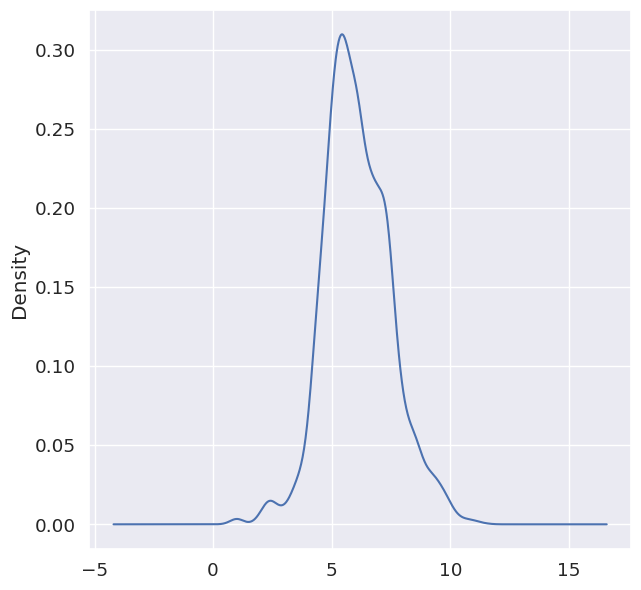

In [47]:
df_final['pIC50'].plot(kind='kde')

We can clearly see that this range and distribution of data is much more legible and can be used to train solid regression models.

### Data statistics and Null checks

In [48]:
df_smiles = df_final # for later reference
df_final.describe()

MW         LogP   NumHDonors  NumHAcceptors  standard_value  \
count  2889.000000  2889.000000  2889.000000    2889.000000    2.889000e+03   
mean    321.384293     3.658169     0.645206       3.866044    2.174328e+10   
std      93.506945     1.311121     1.044597       1.869825    7.236620e+11   
min     130.078000    -1.402800     0.000000       0.000000    4.000000e-03   
25%     257.336000     2.833260     0.000000       3.000000    1.000000e+02   
50%     306.793000     3.654300     0.000000       3.000000    1.000000e+03   
75%     358.416000     4.416900     1.000000       5.000000    7.370000e+03   
max     914.664000    10.306000     9.000000      15.000000    3.388442e+13   

       class_number        pIC50  
count   2889.000000  2889.000000  
mean       1.062651     6.087459  
std        0.704079     1.408644  
min        0.000000     1.000000  
25%        1.000000     5.132533  
50%        1.000000     6.000000  
75%        2.000000     7.000000  
max        2.000000    11.397940

In [49]:

#check duplicate data
check_duplicate(df_final)

'Data Is clean ,No Duplicate Data Found .'

In [50]:
# check missing Value
df_final.isnull().sum().sort_values(ascending=False)

MW                    0
LogP                  0
NumHDonors            0
NumHAcceptors         0
molecule_chembl_id    0
canonical_smiles      0
standard_value        0
class                 0
class_number          0
pIC50                 0
dtype: int64

<AxesSubplot:>

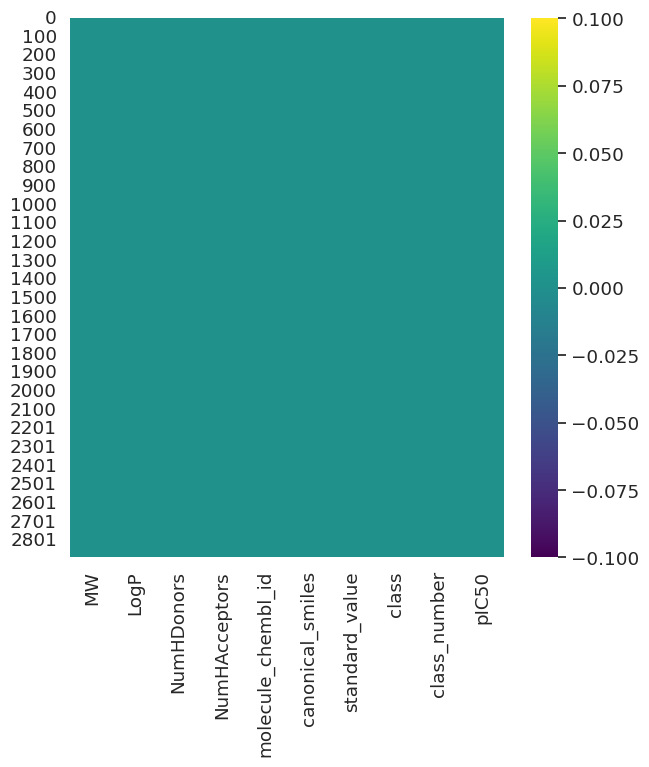

In [51]:
cols =df_final.columns
sns.heatmap(df_final[cols].isnull(), cmap='viridis')

# Data Analaysis & Visualization
Now let us further analyse through visualizations the individual columns in order to check for any skewed data or any outliers.

### Distplots for Numerical Values

  For the numeric columns from our dataset we can extract the mean, median, and mode apart from the boxplot and data density distribution w.r.t respective columns.

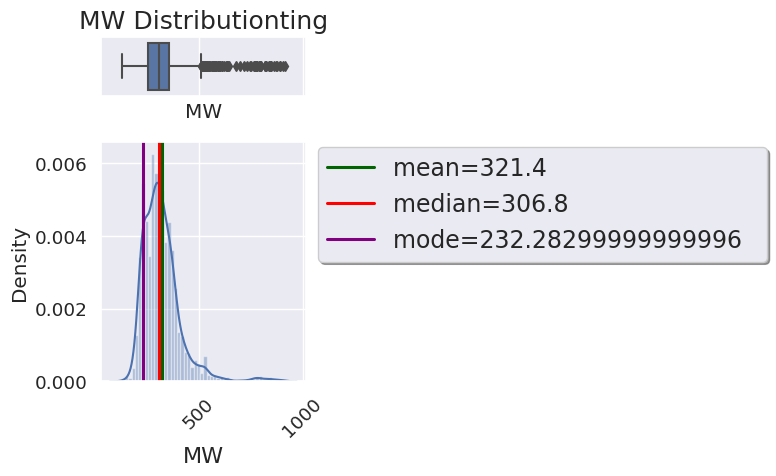

In [52]:
numerical_plotting(df_final,'MW','MW Distributionting','  ')

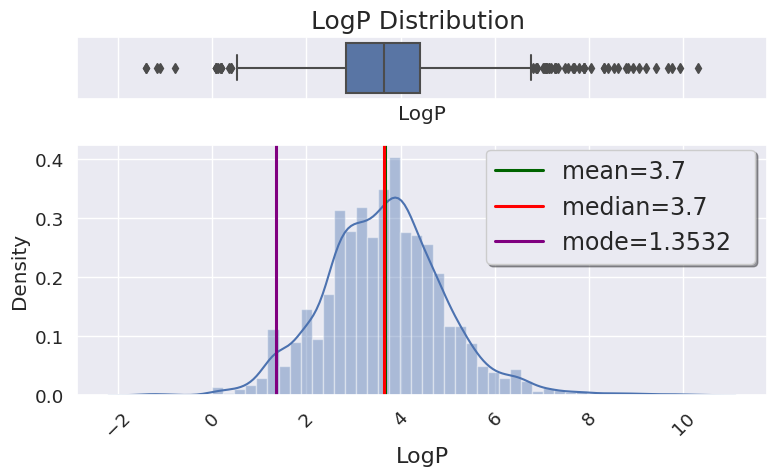

In [53]:
numerical_plotting(df_final,'LogP','LogP Distribution ','  ')

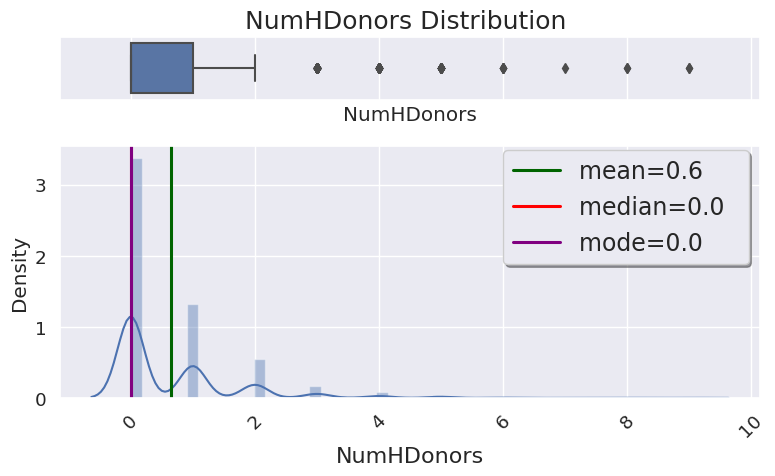

In [54]:
numerical_plotting(df_final,'NumHDonors','NumHDonors Distribution ','  ')

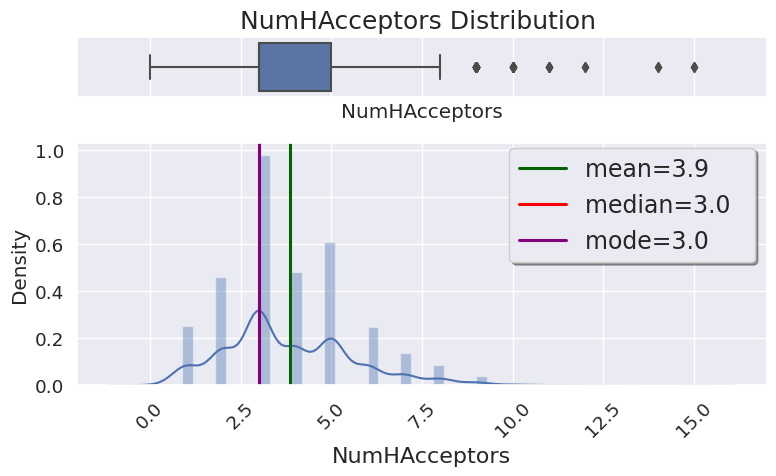

In [55]:
numerical_plotting(df_final,'NumHAcceptors','NumHAcceptors Distribution ','  ')

### Histograms for Categorical values

And for the categorical values from the dataset we will plot the histograms for respective columns.


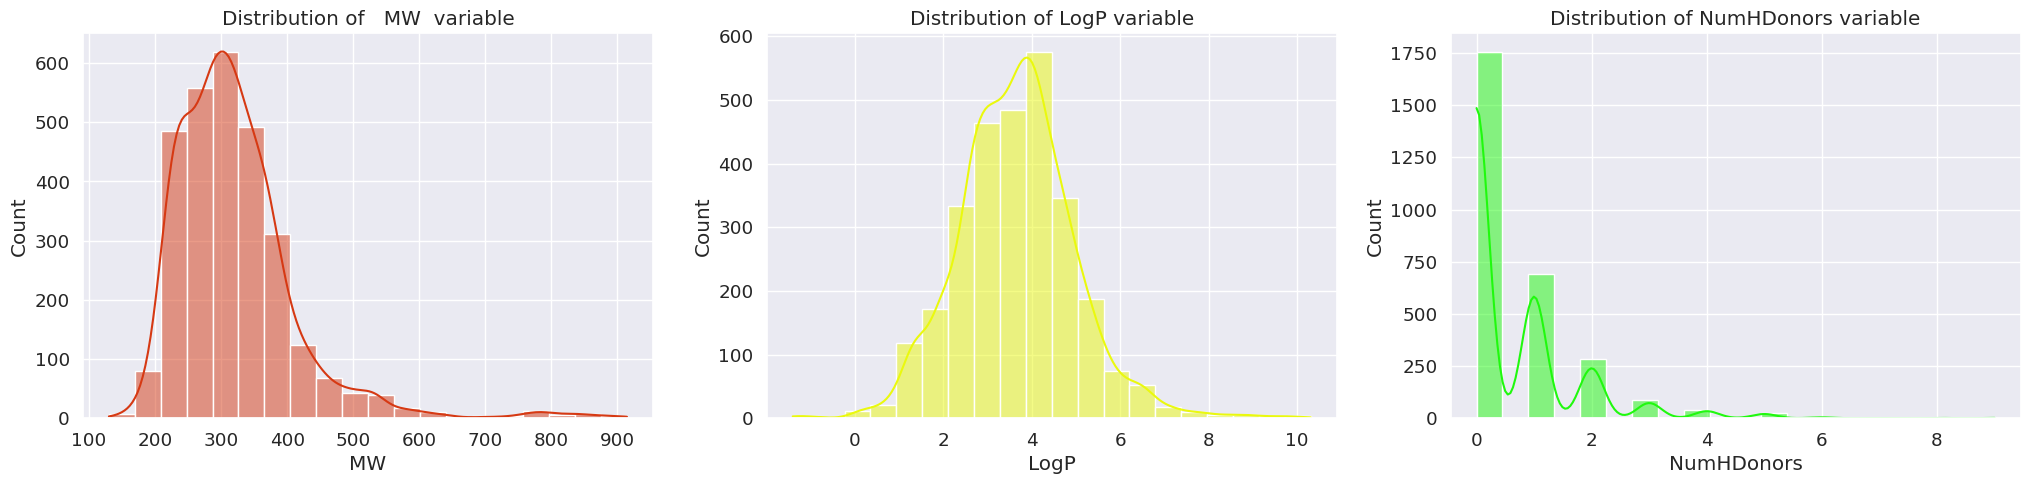

In [56]:
fig, axes = plt.subplots(1, 3, figsize = (25, 5))
ax = axes.flatten()
sns.histplot(ax = axes[0], x = df_final["MW"], bins = 20, kde = True, color = "#D63913").set(title = "Distribution of   MW  variable");
sns.histplot(ax = axes[1], x = df_final["LogP"], bins = 20, kde = True, color = "#EAF90E").set(title = "Distribution of LogP variable");
sns.histplot(ax = axes[2], x = df_final["NumHDonors"], bins = 20, kde = True, color = "#20F90E").set(title = "Distribution of NumHDonors variable");


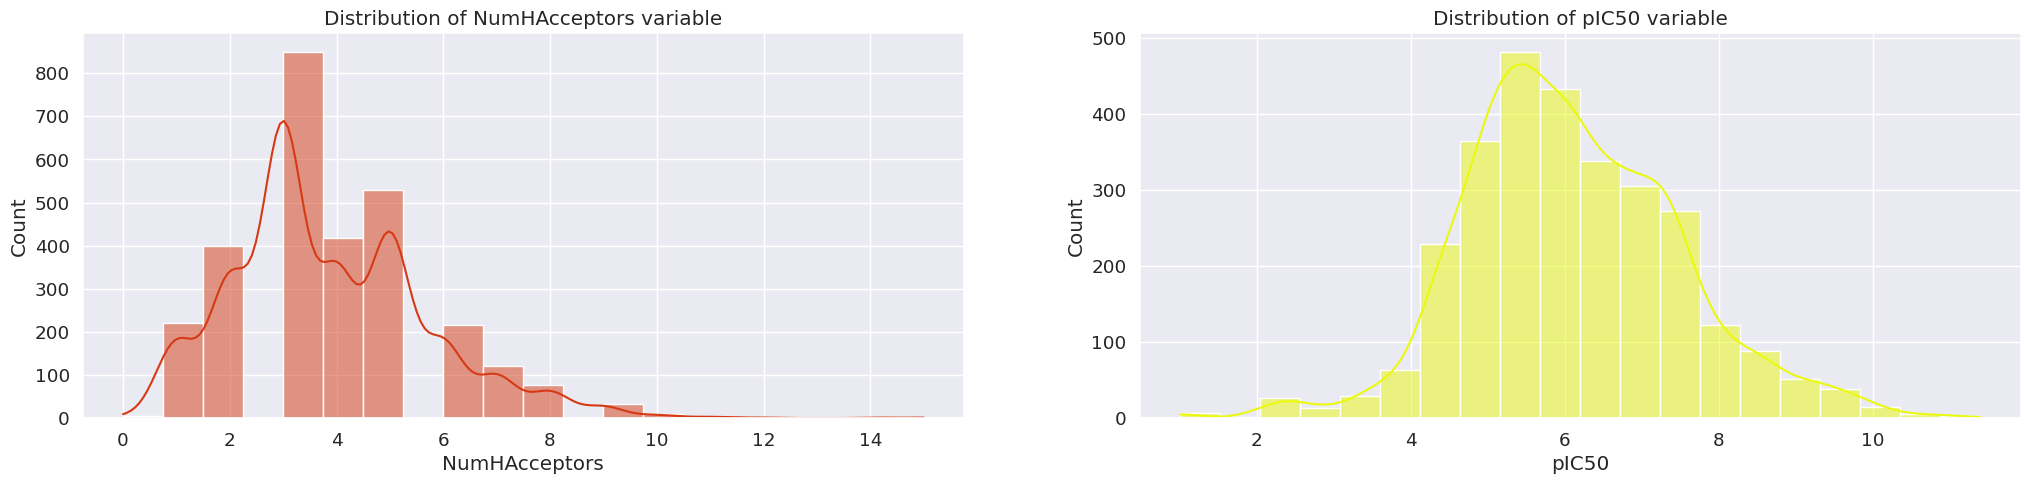

In [57]:
fig, axes = plt.subplots(1, 2, figsize = (25, 5))
ax = axes.flatten()
sns.histplot(ax = axes[0], x = df_final["NumHAcceptors"], bins = 20, kde = True, color = "#D63913").set(title = "Distribution of NumHAcceptors variable");
sns.histplot(ax = axes[1], x = df_final["pIC50"], bins = 20, kde = True, color = "#EAF90E").set(title = "Distribution of pIC50 variable");


<!-- <div class="text_cell_render border-box-sizing rendered_html">
<div style="border-radius: 10px;
            border : black solid;
            background-color: #34baeb;
            font-size:110%;
            text-align: left">

<h3 style="; border:0; border-radius: 10px; font-weight: bold; color:black"><center> Basic Numeric analaysis</center></h3>
<p>● Most of Data is  Normaly Distributed</p>
</div>
</div> -->

From the above analysis we get to know that each of the columns are not highly skewed and that our classifiers and regressors can work on them.
However, we have to explore class-wise distribution or boxplots of the columns in order to see the variety in the distribution of data across the columns which can be learned by our ml models.

## Count Plot

Based on the below distribution we will model our problem such that active class is active class, and we will consider both intermediate and inactive classes as inactive classes for a simpler and more balanced class distribution.

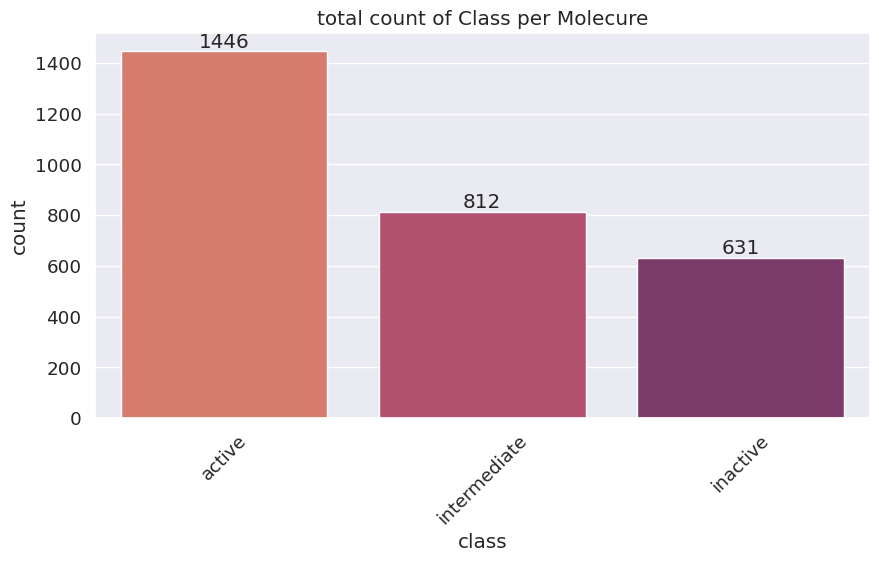

In [58]:
categorical_plotting(df_final,'class','total count of Class per Molecure')

In the above plots we explored the individual column's data distribution. However, it is also important to explore the class wise data distribution in columns.

## Class segregated Box Plots

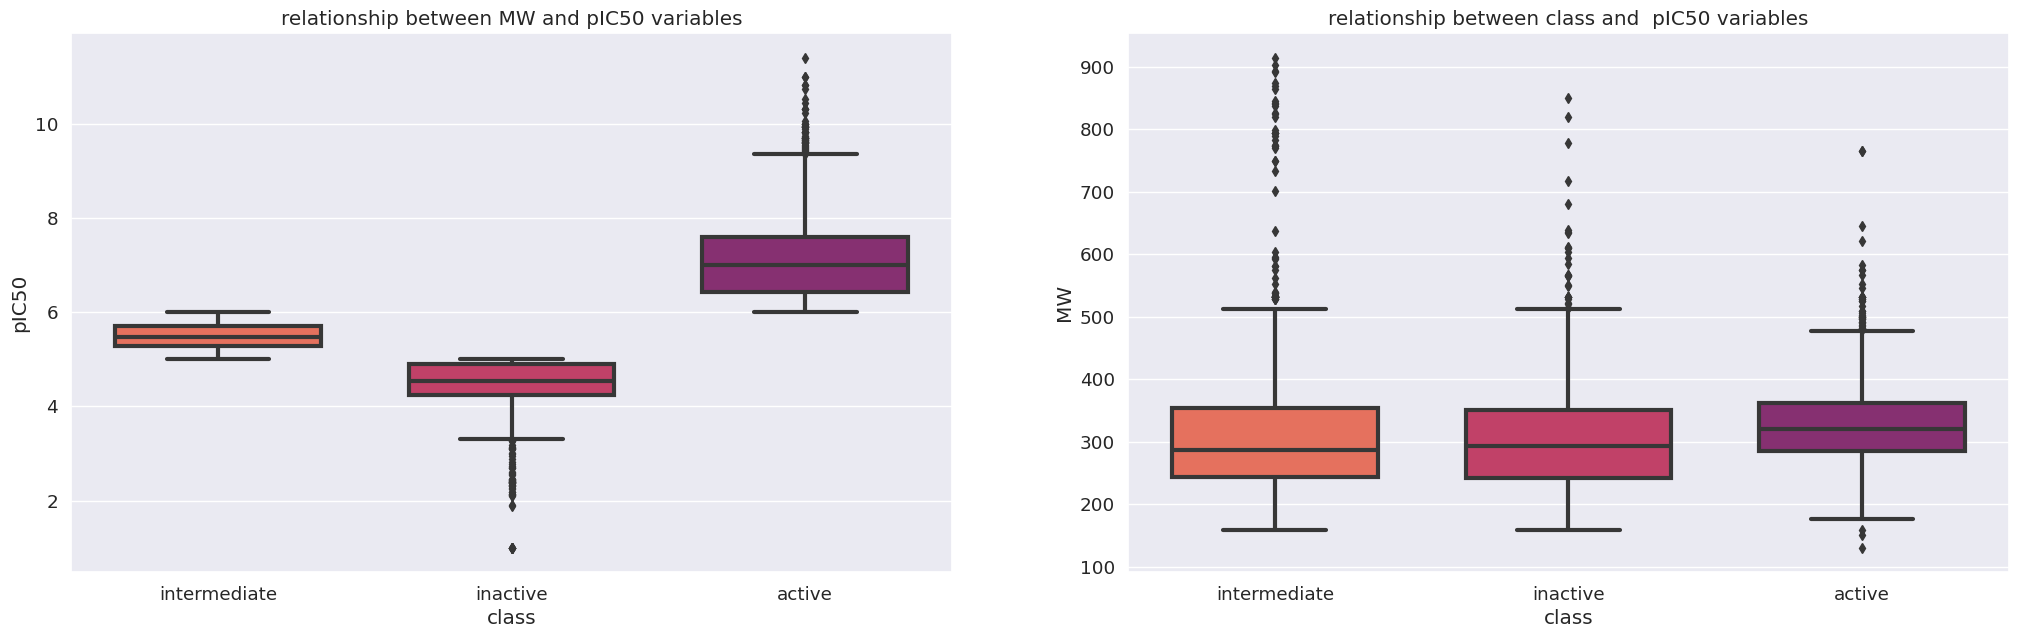

In [59]:

fig, axes = plt.subplots(1, 2, figsize = (25, 7))

sns.boxplot(ax = axes[0], x = "class", y = "pIC50", data = df_final, width = 0.7, orient = "v", fliersize = 5,
            saturation = 1, linewidth = 3,palette='flare');
axes[1].set_title("relationship between class and  pIC50 variables");

sns.boxplot(ax = axes[1], x = "class", y = "MW", data = df_final, width = 0.7, orient = "v", fliersize = 5,
            saturation = 1, linewidth = 3,palette='flare')
axes[0].set_title("relationship between MW and pIC50 variables");

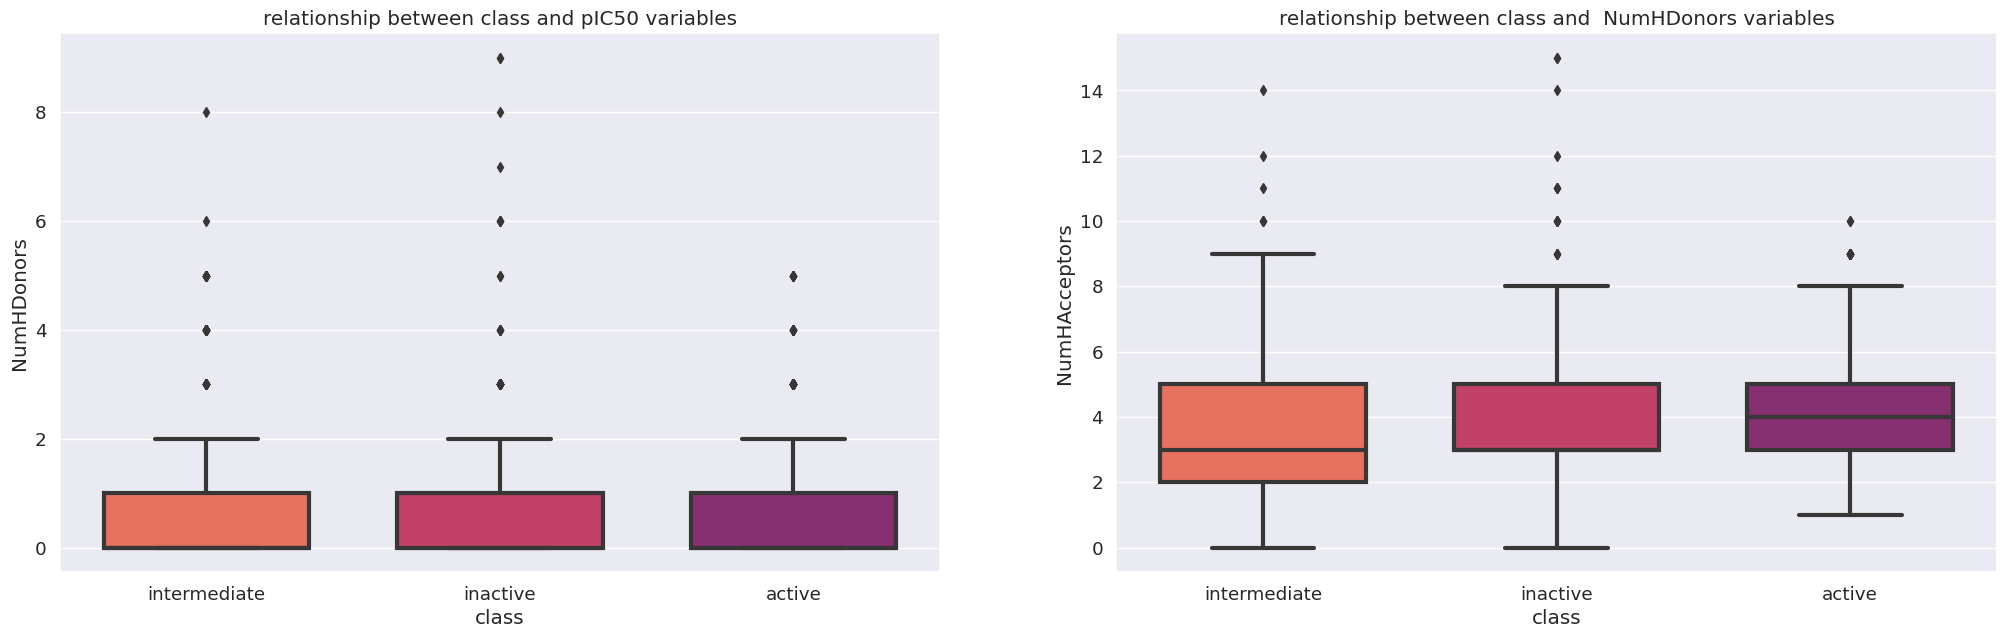

In [60]:

fig, axes = plt.subplots(1, 2, figsize = (25, 7))

sns.boxplot(ax = axes[0], x = "class", y = "NumHDonors", data = df_final, width = 0.7, orient = "v", fliersize = 5,
            saturation = 1, linewidth = 3,palette='flare');
axes[1].set_title("relationship between class and  NumHDonors variables");

sns.boxplot(ax = axes[1], x = "class", y = "NumHAcceptors", data = df_final, width = 0.7, orient = "v", fliersize = 5,
            saturation = 1, linewidth = 3,palette='flare')
axes[0].set_title("relationship between class and pIC50 variables");


## Scatter Plot
Scatter Plot to explore any significant relationship between the variables

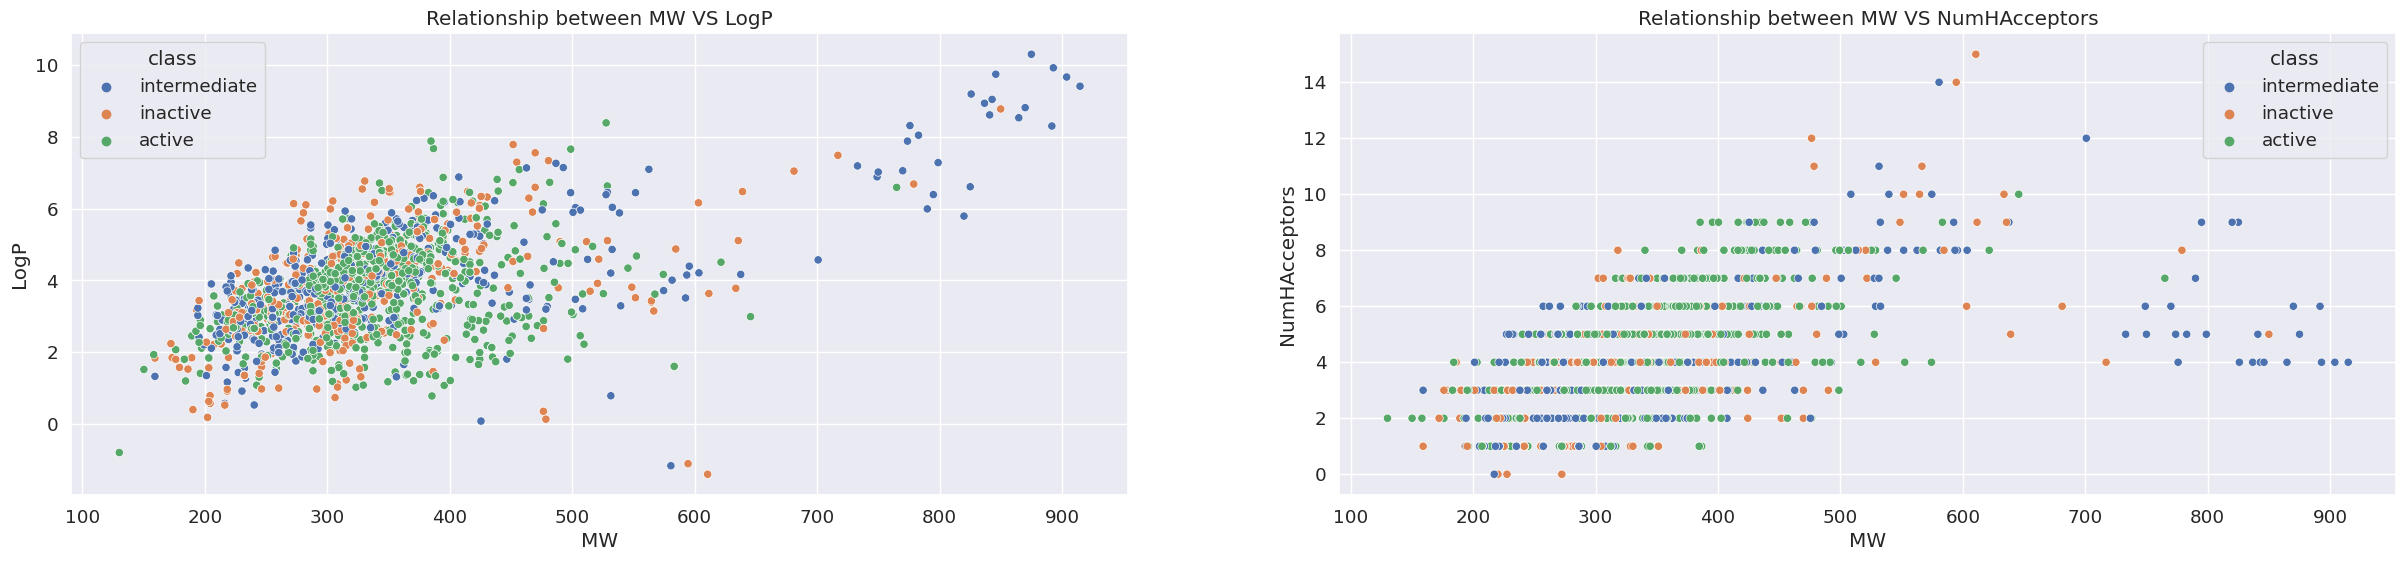

In [61]:
fig, axes = plt.subplots(1, 2, figsize = (30, 6))
axes = axes.flatten()
sns.scatterplot(ax = axes[0], x = "MW", y = "LogP", data = df_final, color = "#000000",hue='class',
                ).set(title = "Relationship between MW VS LogP");

sns.scatterplot(ax = axes[1], x = "MW", y = "NumHAcceptors", data = df_final,hue='class',
                color = "#E9F709").set(title = "Relationship between MW VS NumHAcceptors");

In [62]:
df_final.corr()

MW      LogP  NumHDonors  NumHAcceptors  standard_value  \
MW              1.000000  0.514570    0.346487       0.584111       -0.004997   
LogP            0.514570  1.000000   -0.042298      -0.208555       -0.013055   
NumHDonors      0.346487 -0.042298    1.000000       0.277385        0.015059   
NumHAcceptors   0.584111 -0.208555    0.277385       1.000000        0.023138   
standard_value -0.004997 -0.013055    0.015059       0.023138        1.000000   
class_number    0.038768  0.046355   -0.005076      -0.015979       -0.045364   
pIC50           0.082409 -0.076067   -0.078046       0.228427       -0.108552   

                class_number     pIC50  
MW                  0.038768  0.082409  
LogP                0.046355 -0.076067  
NumHDonors         -0.005076 -0.078046  
NumHAcceptors      -0.015979  0.228427  
standard_value     -0.045364 -0.108552  
class_number        1.000000  0.215177  
pIC50               0.215177  1.000000

## Key Takeaways

From the above analysis we can see that no high degree of multi collinearity exists.

But some positive corrolation exists between Molecular Weight, NumHAcceptors, and LogP (solubility).

Additianally, as we explore the box plots of the input features, we see that many of the box plots are of similar range and mean.  Expecially, columns such as NumHDonors and NumHAcceptors.

Hence this conclusion steers us in the direction to check if we can accumulate more features from molecular sequence in the form of molecular descriptors.

This will give our model a richer context to help differentiate between active and inactive classes and also in regression prediction of the pIC50 values.

# 📌Enter PaDEL Descriptor!

Apart from the above 5 molecular descriptors mentioned above such as Molecular Weight, Solubility etc, there are a wide range of molecular descriptors used in cheminformatics and computational chemistry.  These descriptors provide a quantitative representation of the structural and physicochemical properties of chemical compounds. PaDEL descriptors are particularly useful in the field of quantitative structure-activity relationship (QSAR) studies, where the goal is to correlate the chemical structure of a compound with its biological or chemical activity.


So given a molecular structure, such as in the form of SMILES data.
We can derieve these molecular descriptors including but not limited to
 - Number of Atoms
 - Number of Bonds
 - Radius of Gyration (RG): A measure of the spatial distribution of atoms in a molecule.
 - Electron Affinity (EA): The energy change when an electron is added to a neutral atom or molecule.
 - Molecular Polarizability (MP): A measure of how easily the electron cloud of a molecule can be distorted by an external electric field.
 - Number of Amine Groups (NOAM): The count of amine functional groups in the molecule.



<h4 id="4.1-|- pair Plot"><b>4.1 <span style="color:#4a8fdd">|</span>   Download Padel Descriptor
 </b></h4>


*   it is software to calculate  molecular descriptors, which are numerical values that can be used to characterize the properties of a molecule




In [63]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh


--2023-12-04 04:20:19--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-12-04 04:20:19--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip.2’

padel.zip.2         100%[===================>]  24.57M  --.-KB/s    in 0.05s   

2023-12-04 04:20:20 (459 MB/s) - ‘padel.zip.2’ saved [25768637/25768637]

--2023-12-04 04:20:20--  https:

In [64]:
! unzip padel.zip -y

Archive:  padel.zip
caution: filename not matched:  -y



<h4 id="4.2-|- pair Plot"><b>4.2 <span style="color:#4a8fdd">|</span>   Calculate Molecure  Descriptor
 </b></h4>






In [65]:
selection = ['canonical_smiles','molecule_chembl_id' ]
df3_selection = df_final[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [66]:
! cat 'molecule.smi' | head -5

CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12	CHEMBL341591
C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43C)[C@@H]1CC[C@@H]2[C@H]1CN1	CHEMBL2111947
CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21	CHEMBL431859
CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21	CHEMBL113637
Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21	CHEMBL112021


In [67]:
! cat 'molecule.smi' | wc -l

2889


In [68]:
#start calculation
! bash padel.sh

In [69]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [70]:
#prepare x matrix
df_x = pd.read_csv('/content/descriptors_output.csv')
df_x

Name  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  \
0      CHEMBL113637           1           1           1           0   
1      CHEMBL112021           1           1           1           0   
2      CHEMBL111868           1           1           0           0   
3       CHEMBL41761           1           1           1           0   
4      CHEMBL431859           1           1           1           0   
...             ...         ...         ...         ...         ...   
2884  CHEMBL1200374           1           1           1           0   
2885  CHEMBL5176279           1           1           1           0   
2886     CHEMBL1444           1           1           0           0   
2887  CHEMBL5184829           1           1           1           0   
2888  CHEMBL5177928           1           1           0           0   

      PubchemFP4  PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  \
0              0           0           0           0           0           1   
1              0           0           0           0           0           1   
2              0           0           0           0           0           1   
3              0           0           0           0           0           1   
4              0           0           0           0           0           1   
...          ...         ...         ...         ...         ...         ...   
2884           0           0           0           0           0           1   
2885           0           0           0           0           0           1   
2886           0           0           0           0           0           1   
2887           0           0           0           0           0           1   
2888           0           0           0           0           0           1   

      PubchemFP10  PubchemFP11  PubchemFP12  PubchemFP13  PubchemFP14  \
0               1            1            1            0            1   
1               1            1            1            0            1   
2               1            1            1            0            1   
3               1            1            1            0            1   
4               1            1            1            0            1   
...           ...          ...          ...          ...          ...   
2884            1            1            1            0            0   
2885            1            1            1            0            1   
2886            1            1            1            0            1   
2887            1            1            1            0            1   
2888            1            1            0            0            1   

      PubchemFP15  PubchemFP16  PubchemFP17  PubchemFP18  PubchemFP19  \
0               1            0            0            0            0   
1               1            0            0            0            0   
2               1            0            0            0            0   
3               1            0            0            0            0   
4               1            0            0            0            0   
...           ...          ...          ...          ...          ...   
2884            0            0            0            1            1   
2885            1            0            0            1            1   
2886            1            1            0            0            0   
2887            1            1            0            1            1   
2888            1            0            0            1            1   

      PubchemFP20  PubchemFP21  PubchemFP22  PubchemFP23  PubchemFP24  \
0               0            0            0            1            0   
1               0            0            0            0            0   
2               0            0            0            1            0   
3               0            0            0            1            0   
4               0            0            0            1            0   
...      

#📌 Data Preperation & spliting

In [71]:
df_x= df_x.drop(['Name'], axis=True)
df_x

PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0              1           1           1           0           0           0   
1              1           1           1           0           0           0   
2              1           1           0           0           0           0   
3              1           1           1           0           0           0   
4              1           1           1           0           0           0   
...          ...         ...         ...         ...         ...         ...   
2884           1           1           1           0           0           0   
2885           1           1           1           0           0           0   
2886           1           1           0           0           0           0   
2887           1           1           1           0           0           0   
2888           1           1           0           0           0           0   

      PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  PubchemFP10  \
0              0           0           0           1            1   
1              0           0           0           1            1   
2              0           0           0           1            1   
3              0           0           0           1            1   
4              0           0           0           1            1   
...          ...         ...         ...         ...          ...   
2884           0           0           0           1            1   
2885           0           0           0           1            1   
2886           0           0           0           1            1   
2887           0           0           0           1            1   
2888           0           0           0           1            1   

      PubchemFP11  PubchemFP12  PubchemFP13  PubchemFP14  PubchemFP15  \
0               1            1            0            1            1   
1               1            1            0            1            1   
2               1            1            0            1            1   
3               1            1            0            1            1   
4               1            1            0            1            1   
...           ...          ...          ...          ...          ...   
2884            1            1            0            0            0   
2885            1            1            0            1            1   
2886            1            1            0            1            1   
2887            1            1            0            1            1   
2888            1            0            0            1            1   

      PubchemFP16  PubchemFP17  PubchemFP18  PubchemFP19  PubchemFP20  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               0            0            0            0            0   
...           ...          ...          ...          ...          ...   
2884            0            0            1            1            0   
2885            0            0            1            1            0   
2886            1            0            0            0            0   
2887            1            0            1            1            0   
2888            0            0            1            1            0   

      PubchemFP21  PubchemFP22  PubchemFP23  PubchemFP24  PubchemFP25  \
0               0            0            1            0            0   
1               0            0            0            0            0   
2               0            0            1            0            0   
3               0            0            1            0            0   
4               0            0            1            0            0   
...           ...       

In [72]:
#get y axis that from df_final column (pci)
df_y = df_final['class']
df_y

0       intermediate
1           inactive
2             active
3             active
4             active
            ...     
2885          active
2886        inactive
2887          active
2888          active
2889          active
Name: class, Length: 2889, dtype: object

In [73]:
#printing shape of our data set
df_x.shape, df_y.shape

((2889, 881), (2889,))

In [74]:
final =pd.concat([df_x,df_y, df_final['pIC50'] ],axis=1)
final

PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0            1.0         1.0         1.0         0.0         0.0         0.0   
1            1.0         1.0         1.0         0.0         0.0         0.0   
2            1.0         1.0         0.0         0.0         0.0         0.0   
3            1.0         1.0         1.0         0.0         0.0         0.0   
4            1.0         1.0         1.0         0.0         0.0         0.0   
...          ...         ...         ...         ...         ...         ...   
2885         1.0         1.0         1.0         0.0         0.0         0.0   
2886         1.0         1.0         0.0         0.0         0.0         0.0   
2887         1.0         1.0         1.0         0.0         0.0         0.0   
2888         1.0         1.0         0.0         0.0         0.0         0.0   
2889         NaN         NaN         NaN         NaN         NaN         NaN   

      PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  PubchemFP10  \
0            0.0         0.0         0.0         1.0          1.0   
1            0.0         0.0         0.0         1.0          1.0   
2            0.0         0.0         0.0         1.0          1.0   
3            0.0         0.0         0.0         1.0          1.0   
4            0.0         0.0         0.0         1.0          1.0   
...          ...         ...         ...         ...          ...   
2885         0.0         0.0         0.0         1.0          1.0   
2886         0.0         0.0         0.0         1.0          1.0   
2887         0.0         0.0         0.0         1.0          1.0   
2888         0.0         0.0         0.0         1.0          1.0   
2889         NaN         NaN         NaN         NaN          NaN   

      PubchemFP11  PubchemFP12  PubchemFP13  PubchemFP14  PubchemFP15  \
0             1.0          1.0          0.0          1.0          1.0   
1             1.0          1.0          0.0          1.0          1.0   
2             1.0          1.0          0.0          1.0          1.0   
3             1.0          1.0          0.0          1.0          1.0   
4             1.0          1.0          0.0          1.0          1.0   
...           ...          ...          ...          ...          ...   
2885          1.0          1.0          0.0          1.0          1.0   
2886          1.0          1.0          0.0          1.0          1.0   
2887          1.0          1.0          0.0          1.0          1.0   
2888          1.0          0.0          0.0          1.0          1.0   
2889          NaN          NaN          NaN          NaN          NaN   

      PubchemFP16  PubchemFP17  PubchemFP18  PubchemFP19  PubchemFP20  \
0             0.0          0.0          0.0          0.0          0.0   
1             0.0          0.0          0.0          0.0          0.0   
2             0.0          0.0          0.0          0.0          0.0   
3             0.0          0.0          0.0          0.0          0.0   
4             0.0          0.0          0.0          0.0          0.0   
...           ...          ...          ...          ...          ...   
2885          0.0          0.0          1.0          1.0          0.0   
2886          1.0          0.0          0.0          0.0          0.0   
2887          1.0          0.0          1.0          1.0          0.0   
2888          0.0          0.0          1.0          1.0          0.0   
2889          NaN          NaN          NaN          NaN          NaN   

      PubchemFP21  PubchemFP22  PubchemFP23  PubchemFP24  PubchemFP25  \
0             0.0          0.0          1.0          0.0          0.0   
1             0.0          0.0          0.0          0.0          0.0   
2             0.0          0.0          1.0          0.0          0.0   
3             0.0          0.0          1.0          0.0          0.0   
4             0.0          0.0          1.0          0.0          0.0   
...           ...       

In [75]:
final.dropna(inplace=True)

In [76]:
final

PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0            1.0         1.0         1.0         0.0         0.0         0.0   
1            1.0         1.0         1.0         0.0         0.0         0.0   
2            1.0         1.0         0.0         0.0         0.0         0.0   
3            1.0         1.0         1.0         0.0         0.0         0.0   
4            1.0         1.0         1.0         0.0         0.0         0.0   
...          ...         ...         ...         ...         ...         ...   
2884         1.0         1.0         1.0         0.0         0.0         0.0   
2885         1.0         1.0         1.0         0.0         0.0         0.0   
2886         1.0         1.0         0.0         0.0         0.0         0.0   
2887         1.0         1.0         1.0         0.0         0.0         0.0   
2888         1.0         1.0         0.0         0.0         0.0         0.0   

      PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  PubchemFP10  \
0            0.0         0.0         0.0         1.0          1.0   
1            0.0         0.0         0.0         1.0          1.0   
2            0.0         0.0         0.0         1.0          1.0   
3            0.0         0.0         0.0         1.0          1.0   
4            0.0         0.0         0.0         1.0          1.0   
...          ...         ...         ...         ...          ...   
2884         0.0         0.0         0.0         1.0          1.0   
2885         0.0         0.0         0.0         1.0          1.0   
2886         0.0         0.0         0.0         1.0          1.0   
2887         0.0         0.0         0.0         1.0          1.0   
2888         0.0         0.0         0.0         1.0          1.0   

      PubchemFP11  PubchemFP12  PubchemFP13  PubchemFP14  PubchemFP15  \
0             1.0          1.0          0.0          1.0          1.0   
1             1.0          1.0          0.0          1.0          1.0   
2             1.0          1.0          0.0          1.0          1.0   
3             1.0          1.0          0.0          1.0          1.0   
4             1.0          1.0          0.0          1.0          1.0   
...           ...          ...          ...          ...          ...   
2884          1.0          1.0          0.0          0.0          0.0   
2885          1.0          1.0          0.0          1.0          1.0   
2886          1.0          1.0          0.0          1.0          1.0   
2887          1.0          1.0          0.0          1.0          1.0   
2888          1.0          0.0          0.0          1.0          1.0   

      PubchemFP16  PubchemFP17  PubchemFP18  PubchemFP19  PubchemFP20  \
0             0.0          0.0          0.0          0.0          0.0   
1             0.0          0.0          0.0          0.0          0.0   
2             0.0          0.0          0.0          0.0          0.0   
3             0.0          0.0          0.0          0.0          0.0   
4             0.0          0.0          0.0          0.0          0.0   
...           ...          ...          ...          ...          ...   
2884          0.0          0.0          1.0          1.0          0.0   
2885          0.0          0.0          1.0          1.0          0.0   
2886          1.0          0.0          0.0          0.0          0.0   
2887          1.0          0.0          1.0          1.0          0.0   
2888          0.0          0.0          1.0          1.0          0.0   

      PubchemFP21  PubchemFP22  PubchemFP23  PubchemFP24  PubchemFP25  \
0             0.0          0.0          1.0          0.0          0.0   
1             0.0          0.0          0.0          0.0          0.0   
2             0.0          0.0          1.0          0.0          0.0   
3             0.0          0.0          1.0          0.0          0.0   
4             0.0          0.0          1.0          0.0          0.0   
...           ...       

In [77]:
print(final.columns)

Index(['PubchemFP0', 'PubchemFP1', 'PubchemFP2', 'PubchemFP3', 'PubchemFP4',
       'PubchemFP5', 'PubchemFP6', 'PubchemFP7', 'PubchemFP8', 'PubchemFP9',
       ...
       'PubchemFP873', 'PubchemFP874', 'PubchemFP875', 'PubchemFP876',
       'PubchemFP877', 'PubchemFP878', 'PubchemFP879', 'PubchemFP880', 'class',
       'pIC50'],
      dtype='object', length=883)


In [78]:
x = final.drop(['class', 'pIC50'], axis=True)
y = final['class']

In [79]:
final.columns

Index(['PubchemFP0', 'PubchemFP1', 'PubchemFP2', 'PubchemFP3', 'PubchemFP4',
       'PubchemFP5', 'PubchemFP6', 'PubchemFP7', 'PubchemFP8', 'PubchemFP9',
       ...
       'PubchemFP873', 'PubchemFP874', 'PubchemFP875', 'PubchemFP876',
       'PubchemFP877', 'PubchemFP878', 'PubchemFP879', 'PubchemFP880', 'class',
       'pIC50'],
      dtype='object', length=883)

In [80]:
# x.fillna(0, inplace=True)

In [81]:
check_nan = final.isna().values.any()
check_nan

False

In [82]:
x.shape

(2888, 881)

In [83]:
y.shape

(2888,)

# Remove Low Variance Features

One important aspect of dealing with PaDEL descriptors is that it has a huge number of descriptors. 880 to be precise. Hence it can be the case that for our particular dataset some of the descriptors might not provide much value. As in they might all be 0 or all 1. Hence we can eliminate those rows.

In [84]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
x = selection.fit_transform(x)

In [85]:
x.shape

(2888, 152)

In [86]:
y

0       intermediate
1           inactive
2             active
3             active
4             active
            ...     
2884          active
2885          active
2886        inactive
2887          active
2888          active
Name: class, Length: 2888, dtype: object

In [87]:
y_classification = [ 1 if i=='active' else 0 for i in y]
y_regression = final['pIC50']

# Split into training and Testing Data

In [88]:
# print(y.shape)
x_train ,x_test ,y_train,y_test = train_test_split(x,y_classification,test_size=.2,random_state=42,shuffle=True)


In [89]:
! pip install lazypredict

In [90]:
one=0
zero=0
for i in y_classification:
  if i==0:
    zero+=1
  else:
    one+=1
print(one, zero)

1445 1443


# Model Training and Testing

# Classification

We will use the lazy predict library which has an array of classifiers and regressors and with just one call it trains all of the classifiers so we can perform through experimentation.

Classification!

In [91]:
import lazypredict
from lazypredict.Supervised import LazyRegressor, LazyClassifier

# Defines and builds the lazy regressor
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(x_train, x_train, y_train, y_train)
models_test,predictions_test = clf.fit(x_train, x_test, y_train, y_test)

100%|██████████| 29/29 [00:17<00:00,  1.65it/s]


[LightGBM] [Info] Number of positive: 1154, number of negative: 1156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000554 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 456
[LightGBM] [Info] Number of data points in the train set: 2310, number of used features: 152
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499567 -> initscore=-0.001732
[LightGBM] [Info] Start training from score -0.001732
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 29/29 [00:10<00:00,  2.74it/s]

[LightGBM] [Info] Number of positive: 1154, number of negative: 1156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 456
[LightGBM] [Info] Number of data points in the train set: 2310, number of used features: 152
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499567 -> initscore=-0.001732
[LightGBM] [Info] Start training from score -0.001732


In [92]:
# Performance table of the training set (90% subset)
predictions_train

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.85               0.85     0.85      0.85   
LabelSpreading                     0.85               0.85     0.85      0.85   
DecisionTreeClassifier             0.85               0.85     0.85      0.85   
ExtraTreeClassifier                0.85               0.85     0.85      0.85   
ExtraTreesClassifier               0.85               0.85     0.85      0.85   
LabelPropagation                   0.85               0.85     0.85      0.85   
XGBClassifier                      0.84               0.84     0.84      0.84   
BaggingClassifier                  0.84               0.84     0.84      0.84   
NuSVC                              0.81               0.81     0.81      0.81   
LGBMClassifier                     0.80               0.80     0.80      0.80   
KNeighborsClassifier               0.76               0.76     0.76      0.76   
SVC                                0.74               0.74     0.74      0.74   
CalibratedClassifierCV             0.73               0.73     0.73      0.73   
LinearSVC                          0.73               0.73     0.73      0.73   
RidgeClassifier                    0.72               0.72     0.72      0.72   
LogisticRegression                 0.72               0.72     0.72      0.72   
LinearDiscriminantAnalysis         0.72               0.72     0.72      0.72   
RidgeClassifierCV                  0.72               0.72     0.72      0.72   
SGDClassifier                      0.71               0.71     0.71      0.71   
AdaBoostClassifier                 0.69               0.69     0.69      0.69   
Perceptron                         0.67               0.67     0.67      0.67   
GaussianNB                         0.66               0.66     0.66      0.66   
BernoulliNB                        0.66               0.66     0.66      0.66   
NearestCentroid                    0.66               0.66     0.66      0.66   
PassiveAggressiveClassifier        0.63               0.63     0.63      0.63   
QuadraticDiscriminantAnalysis      0.59               0.59     0.59      0.51   
DummyClassifier                    0.50               0.50     0.50      0.33   

                               Time Taken  
Model                                      
RandomForestClassifier               0.58  
LabelSpreading                       0.40  
DecisionTreeClassifier               0.08  
ExtraTreeClassifier                  0.05  
ExtraTreesClassifier                 0.59  
LabelPropagation                     0.32  
XGBClassifier                        5.23  
BaggingClassifier                    0.24  
NuSVC                                1.30  
LGBMClassifier                       0.25  
KNeighborsClassifier                 0.17  
SVC                                  1.38  
CalibratedClassifierCV               3.96  
LinearSVC                            1.06  
RidgeClassifier                      0.10  
LogisticRegression                   0.25  
LinearDiscriminantAnalysis           0.22  
RidgeClassifierCV                    0.20  
SGDClassifier                        0.15  
AdaBoostClassifier                   0.43  
Perceptron                           0.06  
GaussianNB                           0.04  
BernoulliNB                          0.05  
NearestCentroid                      0.19  
PassiveAggressiveClassifier          0.06  
QuadraticDiscriminantAnalysis        0.13  
DummyClassifier                      0.03

In [93]:
predictions_test

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SVC                                0.69               0.69     0.69      0.69   
ExtraTreeClassifier                0.69               0.69     0.69      0.68   
RandomForestClassifier             0.68               0.68     0.68      0.68   
DecisionTreeClassifier             0.68               0.68     0.68      0.68   
LabelPropagation                   0.68               0.68     0.68      0.68   
NuSVC                              0.68               0.68     0.68      0.68   
LabelSpreading                     0.68               0.68     0.68      0.67   
BaggingClassifier                  0.68               0.68     0.68      0.68   
ExtraTreesClassifier               0.67               0.68     0.68      0.67   
LogisticRegression                 0.67               0.67     0.67      0.67   
SGDClassifier                      0.67               0.67     0.67      0.67   
XGBClassifier                      0.67               0.67     0.67      0.67   
GaussianNB                         0.67               0.67     0.67      0.67   
AdaBoostClassifier                 0.67               0.67     0.67      0.67   
CalibratedClassifierCV             0.66               0.66     0.66      0.66   
RidgeClassifierCV                  0.66               0.66     0.66      0.66   
NearestCentroid                    0.66               0.66     0.66      0.66   
BernoulliNB                        0.66               0.66     0.66      0.66   
LinearSVC                          0.66               0.66     0.66      0.66   
KNeighborsClassifier               0.66               0.66     0.66      0.66   
LGBMClassifier                     0.65               0.65     0.65      0.65   
RidgeClassifier                    0.65               0.65     0.65      0.65   
LinearDiscriminantAnalysis         0.65               0.65     0.65      0.65   
Perceptron                         0.65               0.64     0.64      0.64   
PassiveAggressiveClassifier        0.61               0.61     0.61      0.61   
QuadraticDiscriminantAnalysis      0.57               0.57     0.57      0.49   
DummyClassifier                    0.50               0.50     0.50      0.33   

                               Time Taken  
Model                                      
SVC                                  0.70  
ExtraTreeClassifier                  0.03  
RandomForestClassifier               0.53  
DecisionTreeClassifier               0.07  
LabelPropagation                     0.21  
NuSVC                                0.75  
LabelSpreading                       0.27  
BaggingClassifier                    0.24  
ExtraTreesClassifier                 0.50  
LogisticRegression                   0.10  
SGDClassifier                        0.16  
XGBClassifier                        0.25  
GaussianNB                           0.03  
AdaBoostClassifier                   0.41  
CalibratedClassifierCV               4.09  
RidgeClassifierCV                    0.18  
NearestCentroid                      0.13  
BernoulliNB                          0.03  
LinearSVC                            1.01  
KNeighborsClassifier                 0.06  
LGBMClassifier                       0.18  
RidgeClassifier                      0.09  
LinearDiscriminantAnalysis           0.17  
Perceptron                           0.05  
PassiveAggressiveClassifier          0.05  
QuadraticDiscriminantAnalysis        0.16  
DummyClassifier                      0.04

Code for optional regression analysis

In [94]:
# x_train ,x_test ,y_train,y_test = train_test_split(x,y_regression,test_size=.2,random_state=42,shuffle=True)

# import lazypredict
# from lazypredict.Supervised import LazyRegressor

# # Defines and builds the lazy regressor
# clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
# models_train,predictions_train = clf.fit(x_train, x_train, y_train, y_train)
# models_test,predictions_test = clf.fit(x_train, x_test, y_train, y_test)

In [95]:
# predictions_train

In [96]:
# predictions_test

### Further Optimization doesn't Imporve this much 


### Feature Importance of Padel Descriptors
In chemical compounds, their structure and its constituents are the major determining factor in its properties and its bonding with other compounds.

The above descriptors, though are many, can't be fully representitive of the molecule's interactive capabilities.

Hence they cannot be solely used as features.

### We need a different Approach to this problem


# Improve preformance by Utilizing Molecular Fingerprinting and Graph Convolutional Model!

### Why is it better?

Molecular fingerprints encode properties of small molecules and assess their similarities computationally through bit string comparisons. Now since these fingerprints are strings they have the advantage of being more abstract.

In the below step we will utilize the deepchem library to curate the molecular fingerprints of our input data using their ConvMolFeaturizer and then utilize the Graph Convolutional Model which will then capitalize on these fingerprints to help classify Drug activity on our aromatase enzyme.

In [97]:
df_smiles

MW  LogP  NumHDonors  NumHAcceptors molecule_chembl_id  \
0    329.53  4.29        2.00           2.00       CHEMBL341591   
1    315.50  3.90        2.00           2.00      CHEMBL2111947   
2    412.31  5.71        0.00           3.00       CHEMBL431859   
3    319.38  4.63        0.00           3.00       CHEMBL113637   
4    321.81  4.59        0.00           3.00       CHEMBL112021   
...     ...   ...         ...            ...                ...   
2885 296.41  4.03        0.00           2.00      CHEMBL1200374   
2886 373.42  3.12        2.00           5.00      CHEMBL5184829   
2887 369.45  3.86        1.00           7.00      CHEMBL5176279   
2888 299.36  2.40        1.00           5.00      CHEMBL5177928   
2889 285.31  2.66        0.00           5.00         CHEMBL1444   

                                       canonical_smiles  standard_value  \
0             CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12         7100.00   
1     C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...        50000.00   
2         CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21          238.00   
3                CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21           57.00   
4                    Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21           54.00   
...                                                 ...             ...   
2885  C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...           50.10   
2886  O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...        10000.00   
2887         CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1           31.00   
2888               COc1ccc2cc(/C=N/NC3=NC(=O)CS3)ccc2c1           42.00   
2889               N#Cc1ccc(C(c2ccc(C#N)cc2)n2cncn2)cc1           26.00   

             class  class_number  pIC50  
0     intermediate             2   5.15  
1         inactive             0   4.30  
2           active             1   6.62  
3           active             1   7.24  
4           active             1   7.27  
...            ...           ...    ...  
2885        active             1   7.30  
2886      inactive             0   5.00  
2887        active             1   7.51  
2888        active             1   7.38  
2889        active             1   7.59  

[2889 rows x 10 columns]

In [98]:
X = df_smiles['canonical_smiles'].to_numpy(dtype=str)
y = [ 1 if x=='active' else 0 for x in df_smiles['class']]

In [99]:
y_regression = df_smiles['pIC50']

In [100]:
!pip install --pre deepchem
import deepchem as dc

In [101]:
import rdkit.Chem as Chem
mol=[Chem.MolFromSmiles(x) for x in df_smiles['canonical_smiles']]

featurizer = dc.feat.ConvMolFeaturizer()
mol = featurizer.featurize(mol)

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mol, y, test_size=0.2, random_state=42)
train_dataset = dc.data.NumpyDataset(X_train, y_train)
test_dataset = dc.data.NumpyDataset(X_test, y_test)

In [103]:
n_tasks = 1
model = dc.models.GraphConvModel(n_tasks, mode='classification')
model.fit(train_dataset, nb_epoch=100)

0.10197478294372558

In [105]:
metric = dc.metrics.Metric(dc.metrics.accuracy_score)
print('Training set score:', model.evaluate(train_dataset, [metric]))
print('Test set score:', model.evaluate(test_dataset, [metric]))

Training set score: {'accuracy_score': 0.9511034184335785}
Test set score: {'accuracy_score': 0.8235294117647058}


### Feature Importance of Smiles DATA
Since we used only the molecule files generated from the smiles data it is solely responsible for the imporvement of accuracy over the model using padel descriptors as the features. 

Hence by utilizing graph convolutions and molecular fingerprints we were able to imporve the training data accuracy from 0.85 to 0.95 and the testing data accuracy from 0.69 to 0.83 as compared to the best classifiers from lazypredict.  

# Future Works

Next we can train regression models on the pIC50 column, however, we will required atleast 10^5 rows to actually get any reasonable results. These kinds are data are available in biotech firms so that is not an issue when it comes to industry setting.

Few other topics of exploration are

**Protein Pocket Finding: Convex Hull Algorithm**

For a drug to bind to a protein it must have some cavities or pockets with enough space for a molecule to bind. Finding out where these pockets and how many of them exist also is an important consideration in drug discovery.

**Protein and Ligand Docking and Binding Affinity**

We can computationally simulate the docking procedure between a drug and a protein and determin how well they can literally fit this also helps in the drug discovery process.

*Thank you*